In [1]:
import os
import emoji
from collections import Counter
import pandas as pd
import seaborn as sns
import math
import numpy as np
import re
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import initializers

import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split


2024-08-04 15:46:57.485389: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
X_train = pd.read_csv('./data/final/X_train.csv')
y_train = pd.read_csv('./data/final/y_train.csv')

In [3]:
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

# Y_train

In [4]:
y_train.describe()

,engagement_score_std
count,29574.000000
mean,-0.003186
std,0.983565
min,-0.085557
25%,-0.081718
50%,-0.076722
75%,-0.062623
max,67.077324


In [5]:
y_train.shape

(29574, 1)

In [6]:
y_train.max()

engagement_score_std    67.077324
dtype: float64

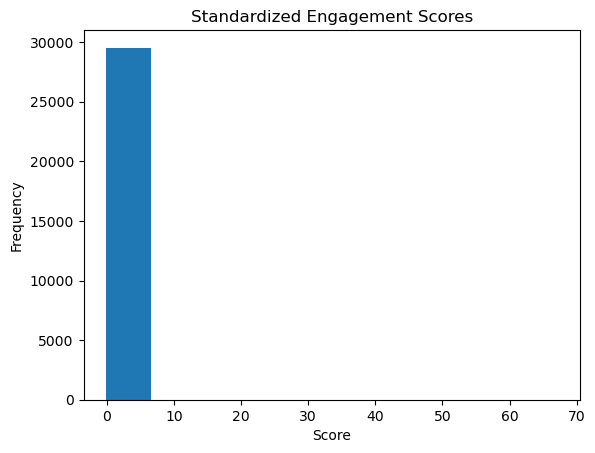

In [25]:
plt.hist(y_train)
plt.title('Standardized Engagement Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

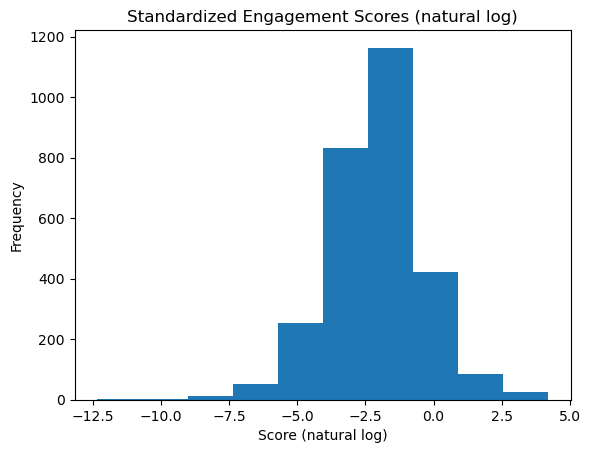

In [24]:
plt.hist(np.log(y_train))
plt.title('Standardized Engagement Scores (natural log)')
plt.xlabel('Score (natural log)')
plt.ylabel('Frequency')
plt.show()

# X_train

In [8]:
X_train.describe()

,pinned,archived,locked,removed,deleted,is_self,is_video,is_original_content,upvote_ratio,gilded,total_awards_received,num_comments,num_crossposts,upvote_ratio_std,score_std,gilded_std,total_awards_received_std,num_comments_std,num_crossposts_std,engagement_score
count,29574.0,29574.0,29574.000000,29574.000000,29574.0,29574.0,29574.0,29574.000000,29574.000000,29574.000000,29574.00000,29574.000000,29574.000000,29574.000000,29574.000000,29574.000000,29574.000000,29574.000000,29574.000000,29574.000000
mean,0.0,0.0,0.001522,0.005884,0.0,1.0,0.0,0.018395,0.776877,0.018597,0.70163,62.955231,0.059647,-0.003648,-0.000287,-0.005382,-0.002050,-0.004585,-0.008892,153.778102
std,0.0,0.0,0.038979,0.076480,0.0,0.0,0.0,0.134376,0.200283,0.226247,10.05621,1147.069150,0.482780,0.999352,1.025631,1.062521,1.132027,0.952456,0.973550,1836.220462
min,0.0,0.0,0.000000,0.000000,0.0,1.0,0.0,0.000000,0.020000,0.000000,0.00000,0.000000,0.000000,-3.780228,-0.080899,-0.092721,-0.081033,-0.056859,-0.129173,0.000000
25%,0.0,0.0,0.000000,0.000000,0.0,1.0,0.0,0.000000,0.670000,0.000000,0.00000,3.000000,0.000000,-0.536930,-0.079932,-0.092721,-0.081033,-0.054368,-0.129173,7.166667
50%,0.0,0.0,0.000000,0.000000,0.0,1.0,0.0,0.000000,0.820000,0.000000,0.00000,8.000000,0.000000,0.211524,-0.076067,-0.092721,-0.081033,-0.050216,-0.129173,16.492537
75%,0.0,0.0,0.000000,0.000000,0.0,1.0,0.0,0.000000,0.950000,0.000000,0.00000,21.000000,0.000000,0.860183,-0.063503,-0.092721,-0.081033,-0.039422,-0.129173,42.815249
max,0.0,0.0,1.000000,1.000000,0.0,1.0,0.0,1.000000,1.000000,18.000000,1024.00000,96694.000000,34.000000,1.109668,93.439386,84.440529,115.190590,80.231919,68.433482,125386.625000


In [9]:
X_train.head(3)

,id,author,created,retrieved,edited,pinned,archived,locked,removed,deleted,...,fulltext,thumbnail,shortlink,upvote_ratio_std,score_std,gilded_std,total_awards_received_std,num_comments_std,num_crossposts_std,engagement_score
0,nrn918,Strict_Magician_2796,2021-06-03 20:33:16,2021-06-04 02:57:38,1970-01-01 00:00:00,0,0,0,0,0,...,negg what am i missing i must be missing somet...,self,https://redd.it/nrn918,-1.385177,-0.080899,-0.092721,-0.081033,-0.056028,-0.129173,1.000000
1,mcxds5,Thatcherj123,2021-03-25 12:45:21,2021-03-25 18:58:24,1970-01-01 00:00:00,0,0,0,0,0,...,zar interest rate 25 march 2021 country of rel...,self,https://redd.it/mcxds5,1.109668,-0.078000,-0.092721,-0.081033,-0.054368,-0.129173,6.000000
2,n1xhjo,AutismVent,2021-04-30 16:25:08,2021-04-30 23:16:44,2021-04-30 22:14:45,0,0,0,0,0,...,rcat the next big drone stock some things to ...,self,https://redd.it/n1xhjo,-0.237548,-0.073167,-0.092721,-0.081033,-0.053537,-0.129173,14.958904


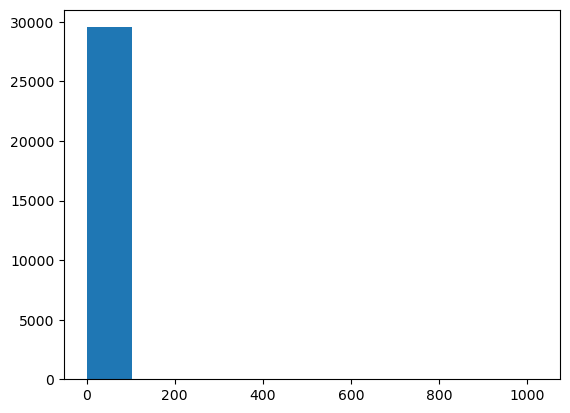

In [10]:
plt.hist(X_train['total_awards_received'])
plt.show()

In [32]:
created_date = pd.to_datetime(X_train['created'])
created_date.dt.day_name()

0         Thursday
1         Thursday
2           Friday
3        Wednesday
4         Thursday
           ...    
29569     Thursday
29570     Thursday
29571     Thursday
29572      Tuesday
29573     Thursday
Name: created, Length: 29574, dtype: object

(array([3065., 3380., 2640., 3141., 2747., 2644., 2627., 2822., 2932.,
        3576.]),
 array([ 1.,  4.,  7., 10., 13., 16., 19., 22., 25., 28., 31.]),
 <BarContainer object of 10 artists>)

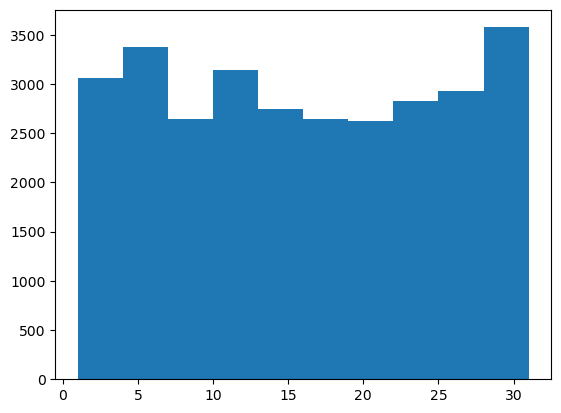

In [35]:
plt.hist(created_date.dt.day)
plt.title('Number of Posts per Day of Month')
plt.xlabel('Day of Month')
plt.ylabel('Number of Posts')

Text(0, 0.5, 'Number of Posts')

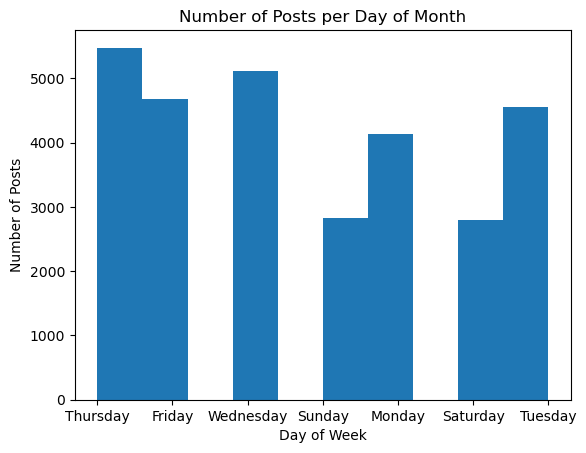

In [38]:
plt.hist(created_date.dt.day_name())
plt.title('Number of Posts per Day of Month')
plt.xlabel('Day of Week')
plt.ylabel('Number of Posts')

## Review selftext

In [12]:
X_train['selftext'].iloc[:5]

0    i must be missing something here can someone p...
1     country of release south africa what does the...
2    today rcat was officially uplisted to nasdaq t...
3    its crazy looking at everything now where most...
4    i invest in vti and during last year i increas...
Name: selftext, dtype: object

## Length of selftext

In [13]:
def get_length(df, column):
    return pd.Series([len(str(i)) if pd.notnull(i) else 0 for i in X_train['selftext']])

In [14]:
selftext_lengths = get_length(X_train, 'selftext')
selftext_lengths.name = 'selftext_length'

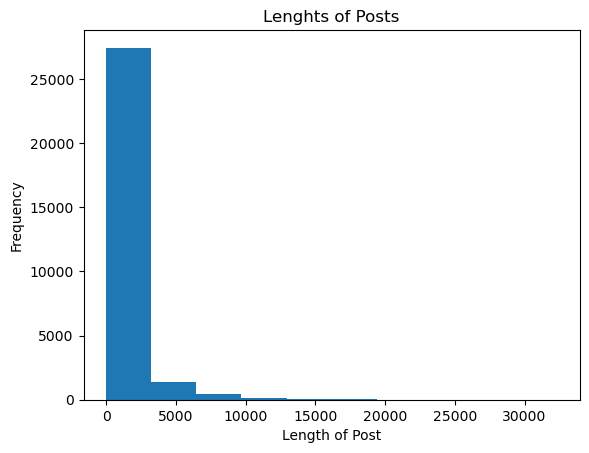

In [42]:
plt.hist(selftext_lengths)
plt.title('Lenghts of Posts')
plt.xlabel('Length of Post')
plt.ylabel('Frequency')
plt.show()

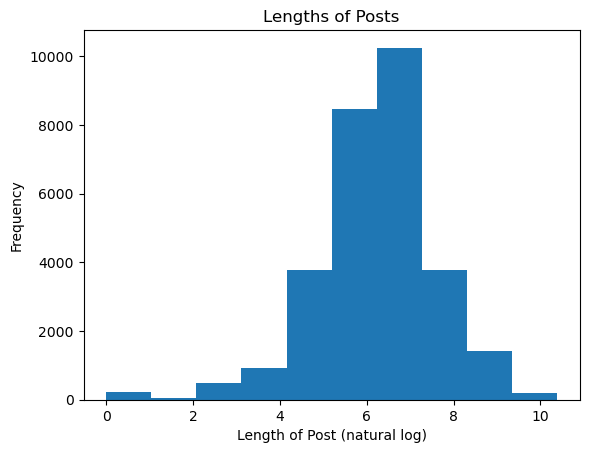

In [43]:
plt.hist(np.log(selftext_lengths))
plt.title('Lengths of Posts')
plt.xlabel('Length of Post (natural log)')
plt.ylabel('Frequency')
plt.show()

## Average words per sample:

In [16]:
mean_words_per_sample = selftext_lengths.mean()

In [17]:
num_samples = selftext_lengths.shape[0]

In [58]:
num_samples_to_mean_words_per_sample = num_samples / mean_words_per_sample

In [61]:
print(f"Samples/mean number of words per sample:\n{round(num_samples_to_mean_words_per_sample,2)}")

Samples/mean number of words per sample:
26.81


In [65]:
selftext_lengths.describe()

count    29574.000000
mean      1103.133800
std       1944.755655
min          1.000000
25%        242.000000
50%        536.000000
75%       1072.750000
max      32338.000000
Name: selftext_length, dtype: float64

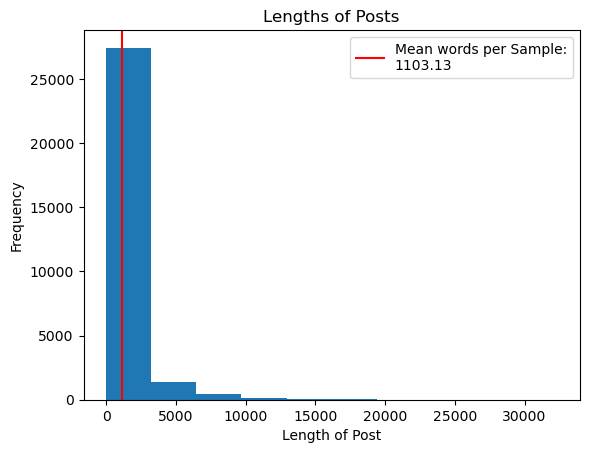

In [62]:
plt.hist(selftext_lengths)
plt.title('Lengths of Posts')
plt.xlabel('Length of Post')
plt.ylabel('Frequency')
plt.axvline(mean_words_per_sample, label=f'Mean words per Sample:\n{round(mean_words_per_sample,2)}', color='red')
plt.legend()
plt.show()

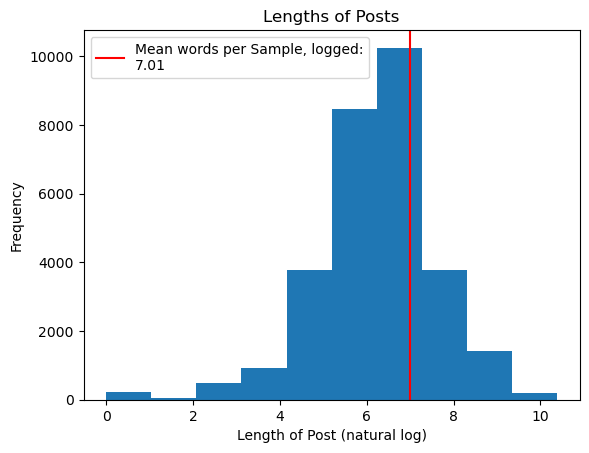

In [63]:
plt.hist(np.log(selftext_lengths))
plt.title('Lengths of Posts')
plt.xlabel('Length of Post (natural log)')
plt.ylabel('Frequency')
plt.axvline(np.log(mean_words_per_sample), label=f'Mean words per Sample, logged:\n{round(np.log(mean_words_per_sample),2)}', color='red')
plt.legend()
plt.show()

# Correlation of Selftext and score

In [64]:
corr_df = pd.concat(
    (selftext_lengths, y_train),
    axis=1)
corr_df.corr()

,selftext_length,engagement_score_std
selftext_length,1.000000,0.014897
engagement_score_std,0.014897,1.000000


This exercises focuses on NLP for the purposes of predicting engagement scores. Many fields would be helpful in training a more accurate predictor (such as num_comments), however these metrics aren't available immediately when the post is created.

In [20]:
X_train_numerics = X_train[['pinned','archived','locked','removed','deleted','upvote_ratio','total_awards_received','num_comments','num_crossposts']]

pd.concat(
    (X_train_numerics, y_train),
    axis=1
).corr()

,pinned,archived,locked,removed,deleted,upvote_ratio,total_awards_received,num_comments,num_crossposts,engagement_score_std
pinned,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
archived,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
locked,NaN,NaN,1.000000,0.008340,NaN,0.007366,0.054902,0.124000,0.029318,0.107376
removed,NaN,NaN,0.008340,1.000000,NaN,0.049656,-0.005236,-0.003953,-0.009505,-0.006189
deleted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
upvote_ratio,NaN,NaN,0.007366,0.049656,NaN,1.000000,0.044034,0.028857,0.051991,0.053121
total_awards_received,NaN,NaN,0.054902,-0.005236,NaN,0.044034,1.000000,0.437513,0.580207,0.769328
num_comments,NaN,NaN,0.124000,-0.003953,NaN,0.028857,0.437513,1.000000,0.105428,0.794172
num_crossposts,NaN,NaN,0.029318,-0.009505,NaN,0.051991,0.580207,0.105428,1.000000,0.399981
engagement_score_std,NaN,NaN,0.107376,-0.006189,NaN,0.053121,0.769328,0.794172,0.399981,1.000000


# Length of fulltext

In [68]:
fulltext_lengths = get_length(X_train, 'fulltext')
fulltext_lengths.name = 'fulltext_length'

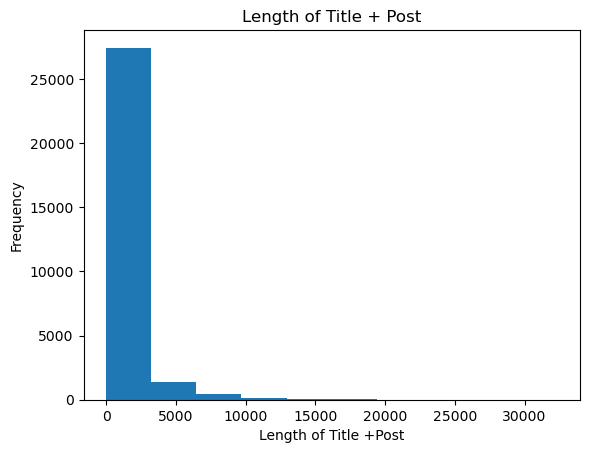

In [77]:
plt.hist(fulltext_lengths)
plt.title('Length of Title + Post')
plt.xlabel('Length of Title +Post')
plt.ylabel('Frequency')
plt.show()

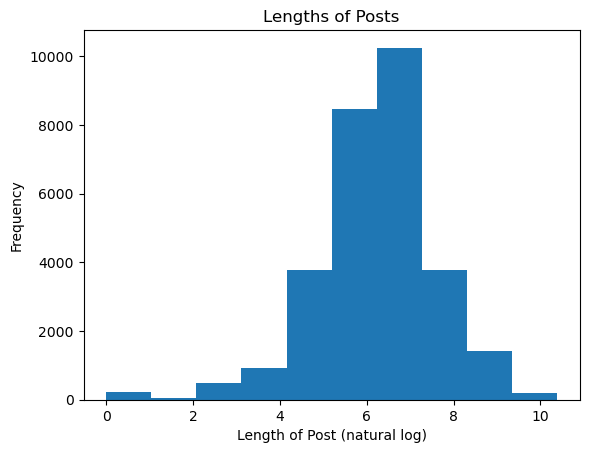

In [78]:
plt.hist(np.log(fulltext_lengths))
plt.title('Lengths of Posts')
plt.xlabel('Length of Post (natural log)')
plt.ylabel('Frequency')
plt.show()

In [87]:
mean_words_per_sample_ft = fulltext_lengths.mean()
num_samples_ft = fulltext_lengths.shape[0]
num_samples_to_mean_words_per_sample_ft = num_samples_ft / mean_words_per_sample_ft

In [88]:
print(f"Samples/mean number of words per sample:\n{round(num_samples_to_mean_words_per_sample_ft,2)}")

Samples/mean number of words per sample:
26.81


In [86]:
fulltext_lengths.describe()

count    29574.000000
mean      1103.133800
std       1944.755655
min          1.000000
25%        242.000000
50%        536.000000
75%       1072.750000
max      32338.000000
Name: fulltext_length, dtype: float64

#### Very long post:

In [89]:
fulltext_lengths[fulltext_lengths==32338.000000]

15411    32338
Name: fulltext_length, dtype: int64

In [92]:
len(X_train.loc[15411]['fulltext'])

32427

In [96]:
X_train.loc[15411]['fulltext'][:100]

'fiii electric last mile solutions huge epic dd the 1st and only class 1 ev van in the us hello all t'

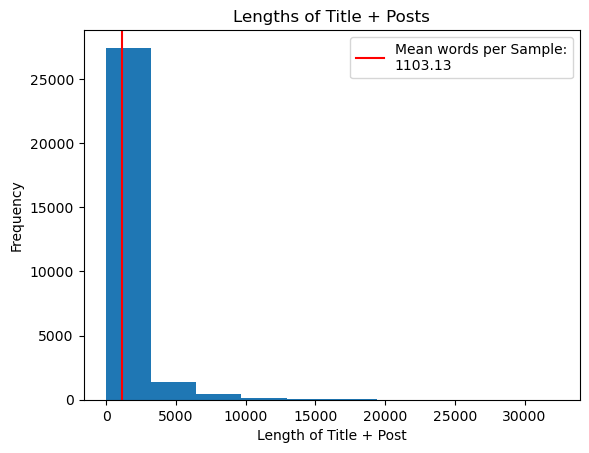

In [83]:
plt.hist(fulltext_lengths)
plt.title('Lengths of Title + Posts')
plt.xlabel('Length of Title + Post')
plt.ylabel('Frequency')
plt.axvline(mean_words_per_sample_ft, label=f'Mean words per Sample:\n{round(mean_words_per_sample_ft,2)}', color='red')
plt.legend()
plt.show()

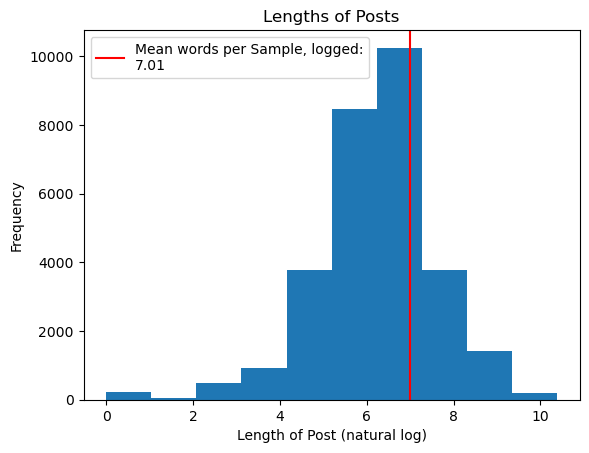

In [84]:
plt.hist(np.log(fulltext_lengths))
plt.title('Lengths of Posts')
plt.xlabel('Length of Post (natural log)')
plt.ylabel('Frequency')
plt.axvline(np.log(mean_words_per_sample_ft), label=f'Mean words per Sample, logged:\n{round(np.log(mean_words_per_sample_ft),2)}', color='red')
plt.legend()
plt.show()